# Example Visualization with SOMs

### Imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from matplotlib.gridspec import GridSpec
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from dbgsom.dbgsom_ import DBGSOM
from dbgsom.SomClassifier import SomClassifier
from dbgsom.SomVQ import SomVQ

## load data

In [6]:
fashion_mnist = pd.read_csv(
    "F:\\Dokumente\\git\\fashion_mnist\\fashion-mnist_train.csv"
)

fashion_mnist_target = fashion_mnist.label
fashion_mnist_train = fashion_mnist.drop("label", axis=1)

### Defining and fitting the som

In [10]:
som = SomVQ(
    max_neurons=50,
    spreading_factor=0.1,
    convergence_iter=10,
    n_iter=300,
    random_state=42,
    verbose=True,
)

scaler = StandardScaler()

pipe = Pipeline(
    steps=[
        ("scaler", scaler),
        ("som", som),
    ]
)

data = fashion_mnist_train

pipe.fit(data)

 56%|█████▌    | 168/300 [01:24<01:06,  1.99 epochs/s]


Pipeline(steps=[('scaler', StandardScaler()),
                ('som',
                 SomVQ(convergence_iter=10, max_neurons=50, n_iter=300,
                       random_state=42, spreading_factor=0.1, verbose=True))])

### Plotting results

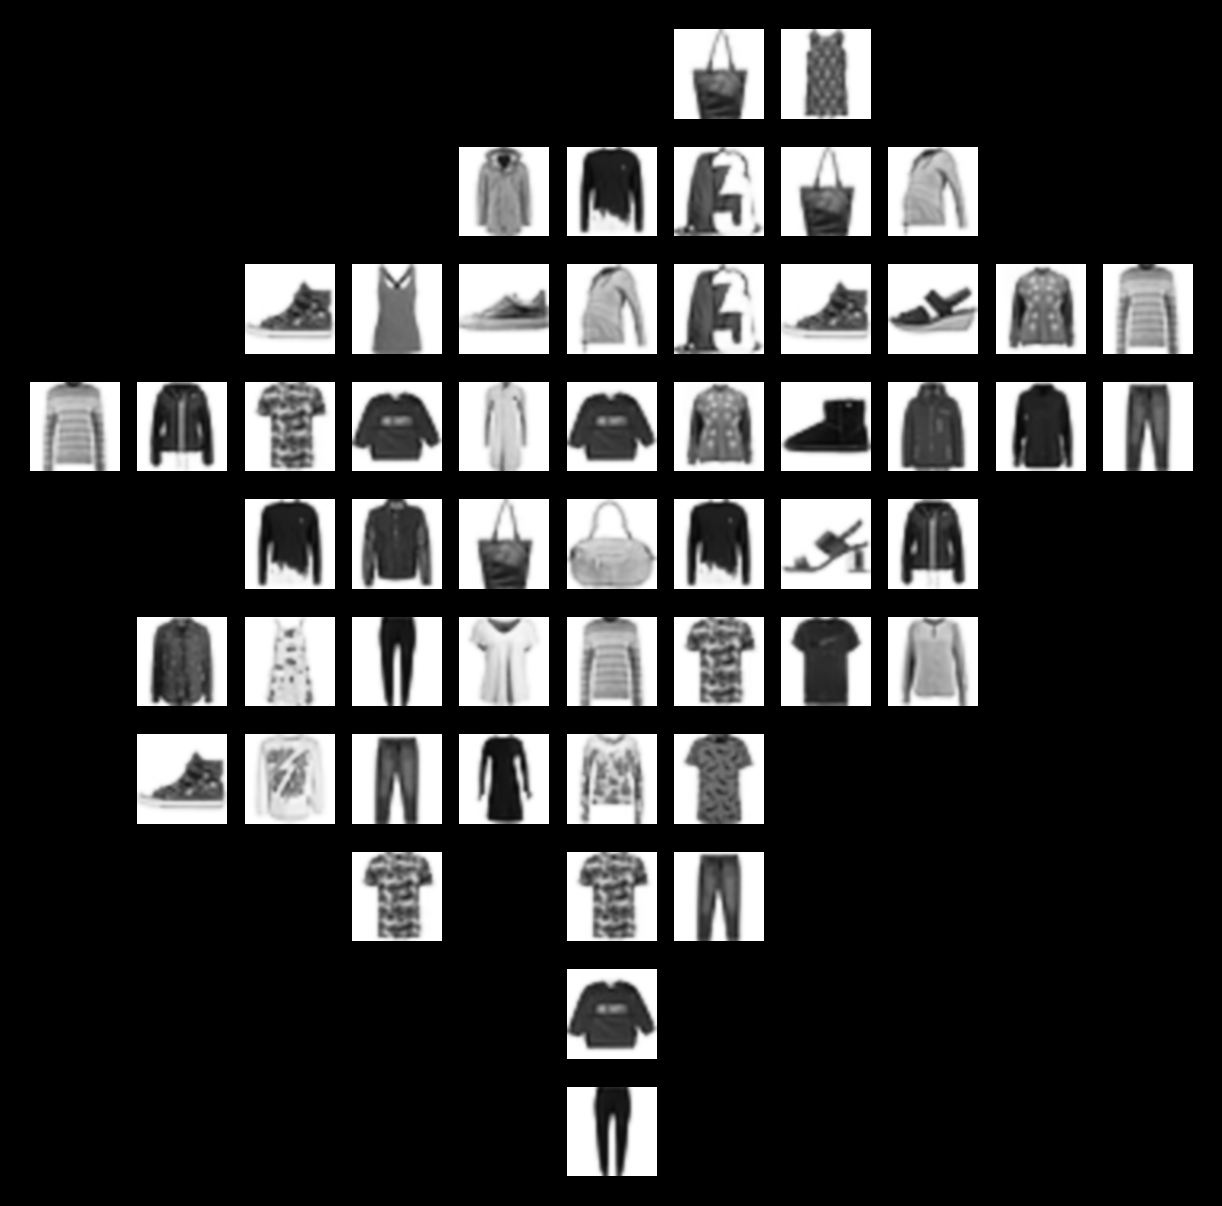

In [19]:
f = plt.figure(figsize=(5, 5), dpi=300)

som = pipe.named_steps["som"]

coordinates = np.array(som.neurons_)

min, max = (np.array(som.neurons_).min(), np.array(som.neurons_).max())
min_x = coordinates[:, 0].min()
max_x = coordinates[:, 0].max()
min_y = coordinates[:, 1].min()
max_y = coordinates[:, 1].max()

# nearest_samples = pipe.transform(data).argmin(axis=0)
# wtf
nearest_samples = pipe.predict(data)#.argmin(axis=0)

gs = GridSpec(nrows=max_x - min_x + 1, ncols=max_y - min_y + 1, figure=f)
for index, neuron in enumerate(coordinates):
    neuron -= [min_x, min_y]
    plt.subplot(gs[neuron[0], neuron[1]])
    # print(neuron>=9)
    plt.imshow(
        data.to_numpy()[nearest_samples[index]].reshape(28, 28),
        cmap="Greys",
        interpolation="bicubic",
    )
    plt.axis("off")

plt.savefig(fname="fashion_mnist.png")

In [13]:
weights = pipe.named_steps["som"].weights_

f = plt.figure(figsize=(5, 5), dpi=300)

dots = pd.DataFrame(np.array(pipe.named_steps["som"].neurons_), columns=["x", "y"])
dots["epoch_created"] = list(
    dict(pipe.named_steps["som"].som_.nodes.data("epoch_created")).values()
)
dots["error"] = list(dict(pipe.named_steps["som"].som_.nodes.data("error")).values())
dots["target"] = fashion_mnist_target[nearest_samples].to_numpy()
p = so.Plot(dots, x="x", y="y", color="target").add(so.Dot()).scale(color="Set1").plot()
p
p.save(loc="fashion_mnist_map.png", bbox_inches="tight")

ValueError: Length of values (60000) does not match length of index (53)

<Figure size 1500x1500 with 0 Axes>

In [ ]:
som.topographic_error_

0.16831666666666667